In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

First let me explain this data to you 
<br>so I have N(ratio of Nitrogen content in soil), P
, K  is nitrogen, phosphorus and potassium respectively
<br>and then Temperature in degree celsius 
<br> humidity is in percentage 
<br>ph is Ph value of the soil 
<br> and finally rainfall in mm

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

so there is no null value present in our dataset which is a good thing 

In [8]:
df.duplicated().sum()

np.int64(0)

There is no duplicated value present in our dataset which is a good thing 

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df['label'].nunique()

22

In [11]:
crop_name=list(df['label'].unique())
crop_name

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

these are all unique crops present in our dataset

#### Lets plot crop requirements

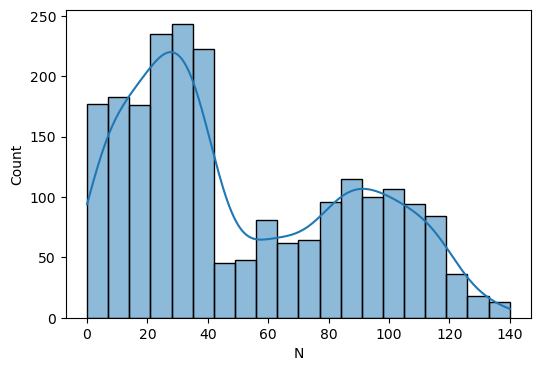

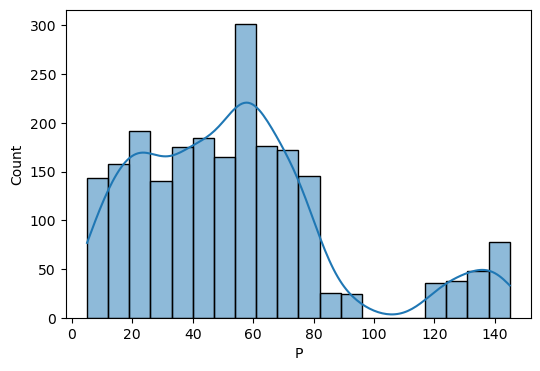

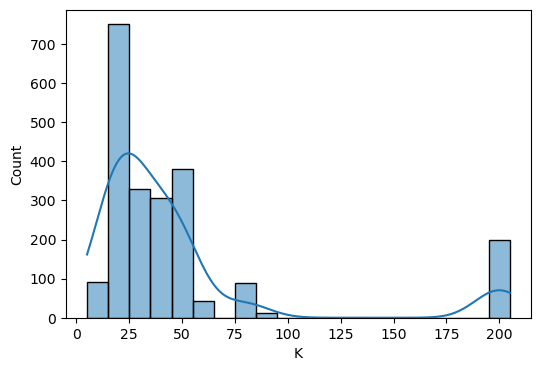

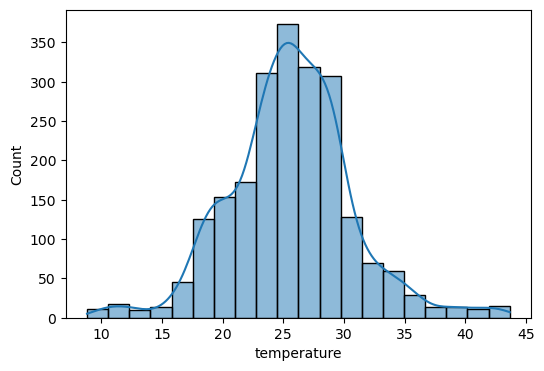

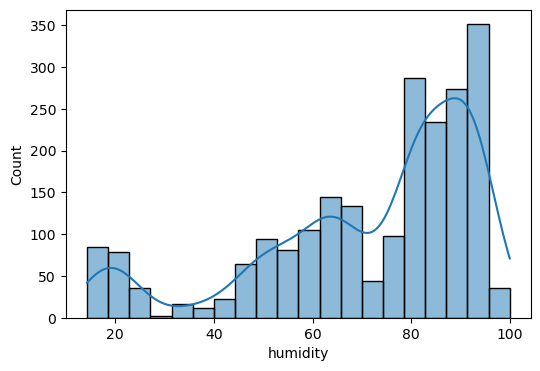

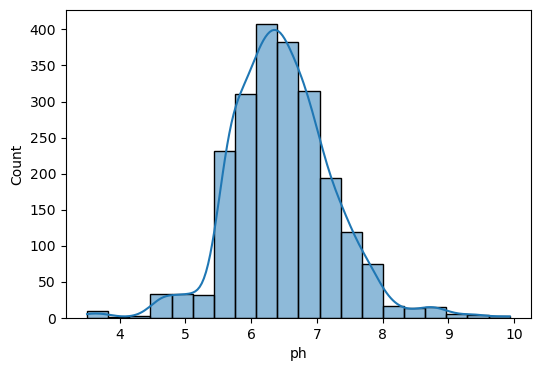

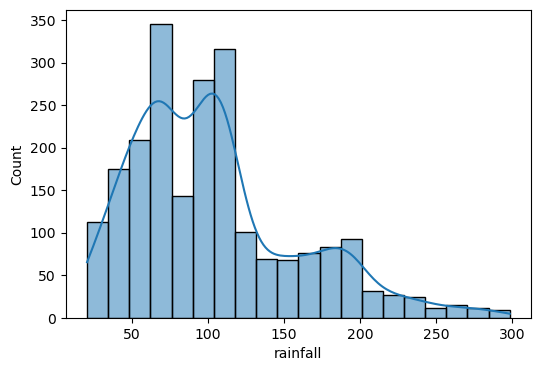

In [12]:
numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True ,bins = 20)

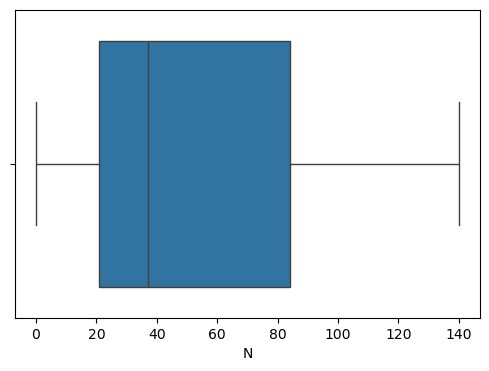

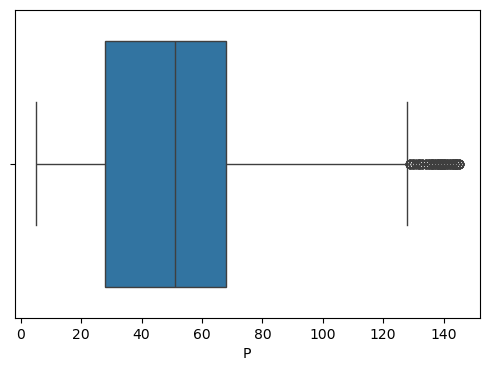

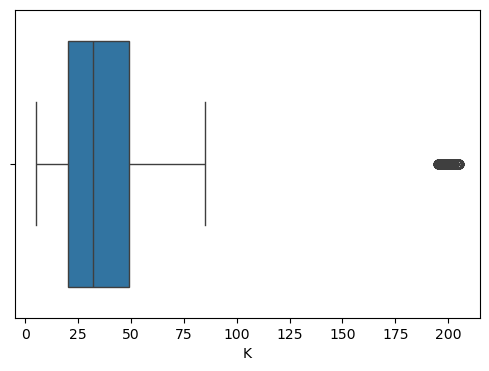

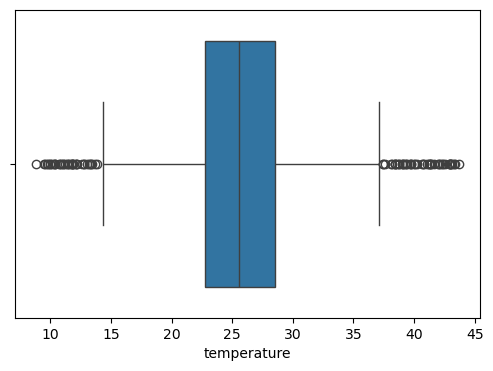

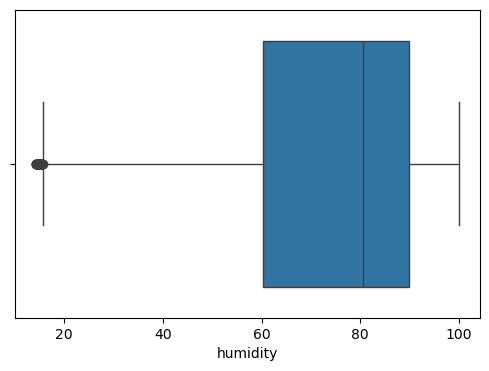

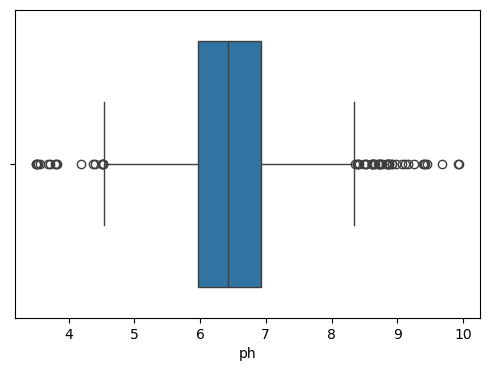

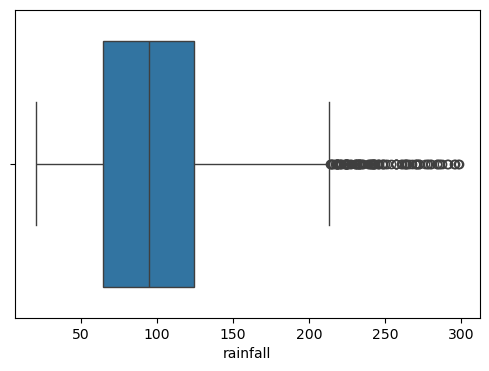

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

In [14]:
df[df['label']=='rice']['N'].mean()

np.float64(79.89)

mean value of N for rice

In [15]:
N={}
for i in crop_name:
    N.update({i:df[df['label']==i]['N'].mean() for i in crop_name})
print(N)

{'rice': np.float64(79.89), 'maize': np.float64(77.76), 'chickpea': np.float64(40.09), 'kidneybeans': np.float64(20.75), 'pigeonpeas': np.float64(20.73), 'mothbeans': np.float64(21.44), 'mungbean': np.float64(20.99), 'blackgram': np.float64(40.02), 'lentil': np.float64(18.77), 'pomegranate': np.float64(18.87), 'banana': np.float64(100.23), 'mango': np.float64(20.07), 'grapes': np.float64(23.18), 'watermelon': np.float64(99.42), 'muskmelon': np.float64(100.32), 'apple': np.float64(20.8), 'orange': np.float64(19.58), 'papaya': np.float64(49.88), 'coconut': np.float64(21.98), 'cotton': np.float64(117.77), 'jute': np.float64(78.4), 'coffee': np.float64(101.2)}


In [16]:
N.items()

dict_items([('rice', np.float64(79.89)), ('maize', np.float64(77.76)), ('chickpea', np.float64(40.09)), ('kidneybeans', np.float64(20.75)), ('pigeonpeas', np.float64(20.73)), ('mothbeans', np.float64(21.44)), ('mungbean', np.float64(20.99)), ('blackgram', np.float64(40.02)), ('lentil', np.float64(18.77)), ('pomegranate', np.float64(18.87)), ('banana', np.float64(100.23)), ('mango', np.float64(20.07)), ('grapes', np.float64(23.18)), ('watermelon', np.float64(99.42)), ('muskmelon', np.float64(100.32)), ('apple', np.float64(20.8)), ('orange', np.float64(19.58)), ('papaya', np.float64(49.88)), ('coconut', np.float64(21.98)), ('cotton', np.float64(117.77)), ('jute', np.float64(78.4)), ('coffee', np.float64(101.2))])

Avg N values for all crops

In [17]:
avg_N=pd.DataFrame(list(N.items()),columns=['Crop','avg_Nitrogen'])
avg_N

,Crop,avg_Nitrogen
0,rice,79.89
1,maize,77.76
2,chickpea,40.09
3,kidneybeans,20.75
4,pigeonpeas,20.73
5,mothbeans,21.44
6,mungbean,20.99
7,blackgram,40.02
8,lentil,18.77
9,pomegranate,18.87


In [18]:
avg_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crop          22 non-null     object 
 1   avg_Nitrogen  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 484.0+ bytes


In [19]:
avg_N.shape

(22, 2)

<Axes: xlabel='avg_Nitrogen', ylabel='Crop'>

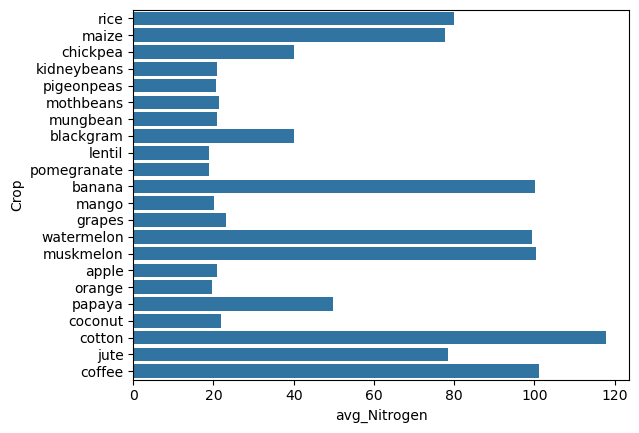

In [20]:
sns.barplot(avg_N,y='Crop',x='avg_Nitrogen',width=0.8,orient='h')

Avg P values for all crops

<Axes: xlabel='avg_phosphorus', ylabel='Crop'>

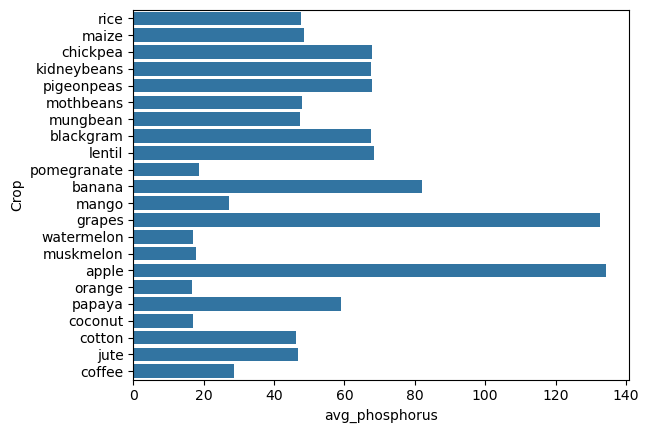

In [21]:
P={}
for i in crop_name:
    P.update({i:df[df['label']==i]['P'].mean() for i in crop_name})
avg_P=pd.DataFrame(list(P.items()),columns=['Crop','avg_phosphorus'])
sns.barplot(avg_P,y='Crop',x='avg_phosphorus',width= 0.8,orient='h')  

In [22]:
P_range_df=pd.DataFrame()
num=1
for i in crop_name:
    a=pd.DataFrame([[i,dict(avg_P.values)[i]-10,dict(avg_P.values)[i]+10]],columns=['crop','minP','maxP'],index=[num])
    P_range_df=pd.concat([P_range_df,a])
    num+=1
    
P_range_df.head()

,crop,minP,maxP
1,rice,37.58,57.58
2,maize,38.44,58.44
3,chickpea,57.79,77.79
4,kidneybeans,57.54,77.54
5,pigeonpeas,57.73,77.73


In [23]:
N_range_df=pd.DataFrame()
num=1
for i in crop_name:
    a=pd.DataFrame([[i,dict(avg_N.values)[i]-10,dict(avg_N.values)[i]+10]],columns=['crop','minN','maxN'],index=[num])
    N_range_df=pd.concat([N_range_df,a])
    num+=1 
    
N_range_df.head()

,crop,minN,maxN
1,rice,69.89,89.89
2,maize,67.76,87.76
3,chickpea,30.09,50.09
4,kidneybeans,10.75,30.75
5,pigeonpeas,10.73,30.73


Avg K value for all crops

<Axes: xlabel='avg_potassium', ylabel='Crop'>

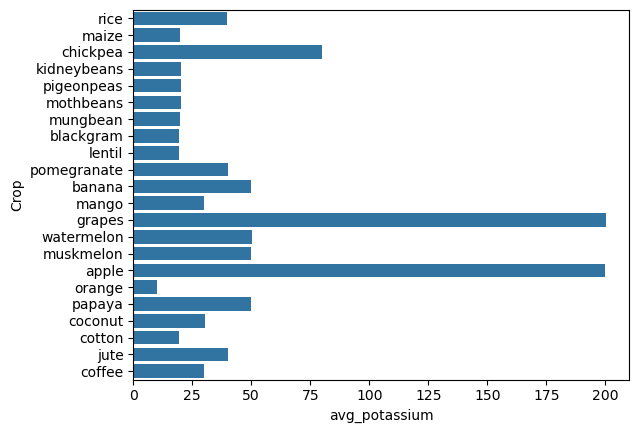

In [24]:
K={}
for i in crop_name:
    K.update({i:df[df['label']==i]['K'].mean() for i in crop_name})
avg_K=pd.DataFrame(list(K.items()),columns=['Crop','avg_potassium'])
sns.barplot(avg_K,y='Crop',x='avg_potassium',width=0.8,orient='h')

Avg required Rainfall(r) for all crops

<Axes: xlabel='avg_rainfall', ylabel='Crop'>

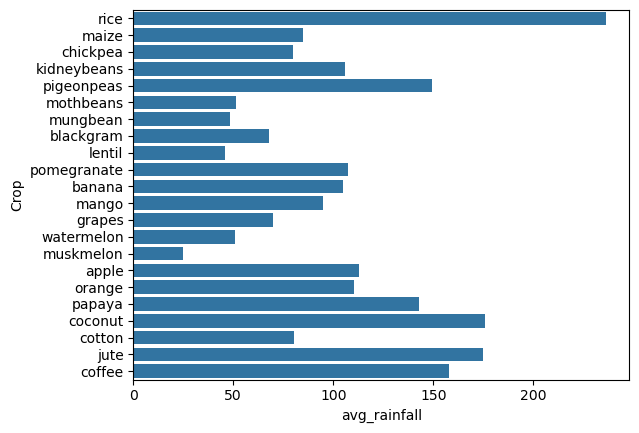

In [25]:
r={}
for i in crop_name:
    r.update({i:df[df['label']==i]['rainfall'].mean() for i in crop_name})
avg_rainfall=pd.DataFrame(list(r.items()),columns=['Crop','avg_rainfall'])
sns.barplot(avg_rainfall,y='Crop',x='avg_rainfall',width=0.8,orient='h')

Avg required Temperature (t) conditions for all crops

<Axes: xlabel='avg_temp', ylabel='Crop'>

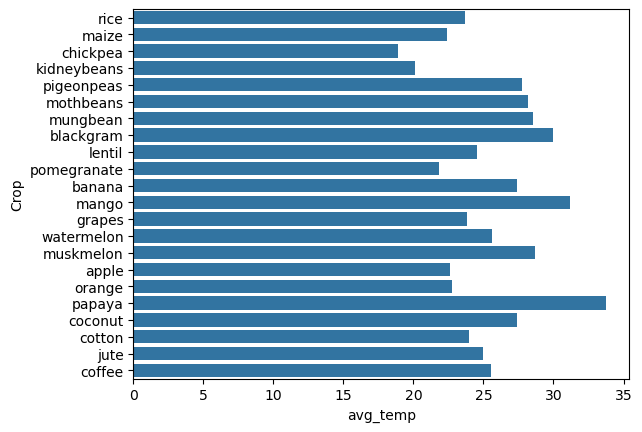

In [26]:
t={}
for i in crop_name:
    t.update({i:df[df['label']==i]['temperature'].mean() for i in crop_name})
avg_temp=pd.DataFrame(list(t.items()),columns=['Crop','avg_temp'])
sns.barplot(avg_temp,y='Crop',x='avg_temp',width=0.8,orient='h')

Avg required PH values in soil for all crops

<Axes: xlabel='avg_ph', ylabel='Crop'>

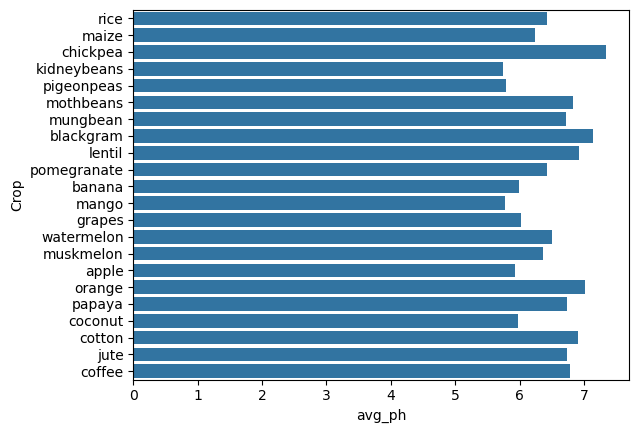

In [27]:
p={}
for i in crop_name:
    p.update({i:df[df['label']==i]['ph'].mean() for i in crop_name})
avg_ph=pd.DataFrame(list(p.items()),columns=['Crop','avg_ph'])
sns.barplot(avg_ph,y='Crop',x='avg_ph',width=0.8,orient='h')

In [28]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

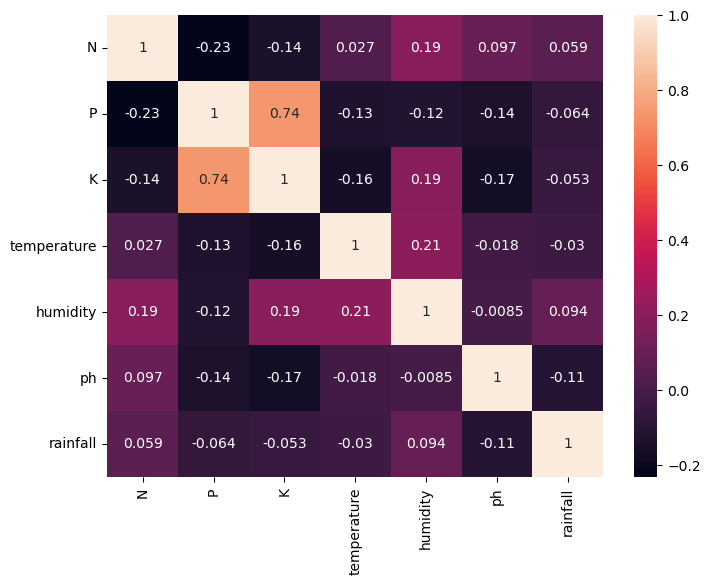

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Train Test Split

In [30]:
X = df[['N','P','K','temperature','humidity','ph','rainfall']]
Y = df['label']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [32]:
y_train

1975       cotton
1287       grapes
760     blackgram
267      chickpea
2007         jute
          ...    
1033       banana
1731       papaya
763     blackgram
835        lentil
1653       orange
Name: label, Length: 1650, dtype: object

#### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
y_train=encoder.fit_transform(y_train)

In [35]:
y_test=encoder.transform(y_test)

In [36]:
y_train

array([ 6,  7,  2, ...,  2, 10, 16], shape=(1650,))

In [37]:
y_test

array([21, 21,  7,  3,  2, 20, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10,  5, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21, 13, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20,  2, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 13, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
       18, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19, 20,
       20,  2, 17,  2,  5

In [38]:
encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()

In [41]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score,f1_score

In [43]:
y_pred=rfc.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.9981818181818182

In [45]:
mean_squared_error(y_test,y_pred)

0.26181818181818184

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
score = cross_val_score(rfc,X=X, y=Y,cv=7,scoring='accuracy')
score

array([0.9968254 , 1.        , 0.99044586, 0.99681529, 0.99681529,
       0.99363057, 0.99044586])

Prediction Test

In [48]:
data = np.array([[104,18,30,23.6,60,6.67,140]])
prediction = encoder.inverse_transform(rfc.predict(data))
print(prediction)

['coffee']


In [49]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [52]:
data = np.array([[78,42,42,20,80,7.6,256]])

In [55]:
data = np.array([[78,42,42,20,80,7.6,256]])
prediction = encoder.inverse_transform(rfc.predict(data))
print(prediction)

['rice']


In [56]:
import pickle

In [57]:
pickle.dump(encoder,open('encoder.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))